In [1]:
#importing Core-Libraries & Exploratory Data Analysis
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

#importing pre-processing libraries
from sklearn.preprocessing import LabelEncoder, RobustScaler, StandardScaler
from sklearn.model_selection import train_test_split
from collections import defaultdict

#importing machine learning libraries
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier as Knn

#performance metrics libraries
from sklearn.feature_selection import chi2
from sklearn.metrics import confusion_matrix,classification_report, roc_auc_score, RocCurveDisplay


*All libraries imported successfully*

In [2]:
#importing & reading dataset

data = pd.read_csv('heart.csv')
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


*Only first 5 rows of the dataset displayed*

In [3]:
#checking missing data

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


*There is no missing values out of 918 rows in the dataset*

In [4]:
#checking data description

data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


**There is data irregularities**.
It is not possible for a living being to have:
*0 RestingBP*,
*0 Cholesterol*,
*0 FastingBS*

***Therefore, we need to perform EDA to understand the data in a better sense.***

**EXPLORATORY DATA ANALYSIS**

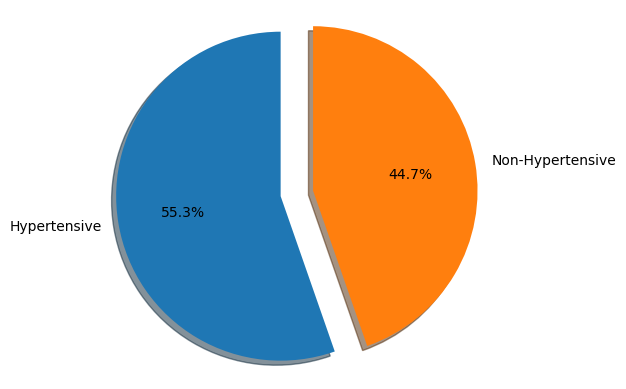

In [5]:
#percentage of heart disease

heart_counts = data['HeartDisease'].value_counts()
labels = 'Hypertensive', 'Non-Hypertensive'
explode = (0.1,0.1)

ax = plt.subplot()
ax.pie(heart_counts, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax.axis('equal')
plt.show()

Morethan 55% of the patients in the dataset are heart disease (hypertensive)

In [6]:
#Checking the Distribution of Age

age_his = px.histogram(data, x='Age', marginal='box', color_discrete_sequence=['#C147E9'])
age_his.update_layout(title='Age Distribution')
age_his.show()

Distribution of Ages shown that most of the patient are between 42 - 65 Years of age.

In [7]:
#distribution of Age as per heart disease

cls = 'HeartDisease'
mrg = 'box'
hst = 'density'
cdm = {0:'#C147E9',1:'#F06292'}

age_hds = px.histogram(data, x='Age', color=cls, marginal=mrg, histnorm=hst, color_discrete_map=cdm)
age_hds.show()

This is suggesting that the higher the ages of the patients, the higher the chances of having heart disease

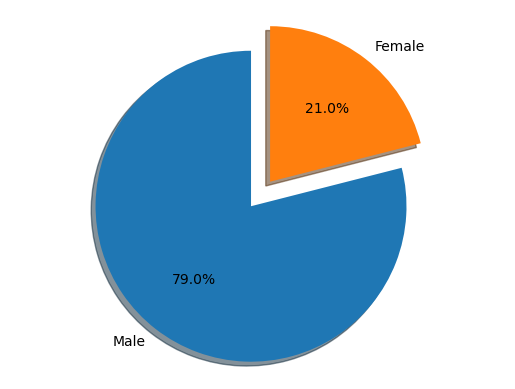

In [8]:
#distrubtion of sex

sex_counts = data['Sex'].value_counts()
labels = 'Male', 'Female'
explode = (0.1,0.1)

ax = plt.subplot()
ax.pie(sex_counts, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax.axis('equal')
plt.show()

About of 80% of the patients are male.

In [9]:
#sex distribution on heart disease

x='Sex'
cdm = {0:'#C147E9',1:'#F06292'}
clr='HeartDisease'

bar_sex_hd = px.histogram(data, x=x,color=clr, barmode='group', color_discrete_map=cdm)
bar_sex_hd.show()

The output suggested that Male are more likely to have Heart Disease than Female

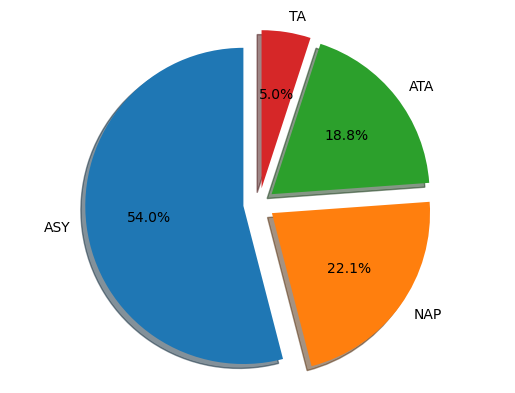

In [13]:
#percentage distrubtion of chest pain

chest_counts = data['ChestPainType'].value_counts()
labels = 'ASY', 'NAP', 'ATA', 'TA'
explode = (0.1,0.1,0.1,0.1)

ax = plt.subplot()
ax.pie(chest_counts, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax.axis('equal')
plt.show()

Most of the patients are Asymptomatic with highest scores of 54%.

In [14]:
#chest pain type distribution on heart disease

x='ChestPainType'
clr='HeartDisease'
cdm = {0:'#C147E9',1:'#F06292'}

bar_chest_hd = px.histogram(data, x=x,color=clr, barmode='group', color_discrete_map=cdm)
bar_chest_hd.show()

This is indicating that majority of heart diseased patients are asymptomatic and having chest pain may not necessarily results to a heart disease or may not be due to a heart disease.

In [15]:
#Checking the Distribution of resting Blood Pressure

rbp_his = px.histogram(data, x='RestingBP', marginal='box', color_discrete_sequence=['#C147E9'])
rbp_his.update_layout(title='Resting Blood Pressure')
rbp_his.show()

Majority of the patients have a Resting Blood Pressure between 110 - 150

In [16]:
#distribution of RestingBP as per heart disease

cls = 'HeartDisease'
x = 'RestingBP'
mrg = 'box'
hst = 'density'
cdm = {0:'#C147E9',1:'#F06292'}

rbp_hds = px.histogram(data, x=x, color=cls, marginal=mrg, histnorm=hst, color_discrete_map=cdm)
rbp_hds.show()

The distribution shown that patient with higher restingBP have more chances of heart disease.

In [27]:
#Checking the Distribution of Cholesterol

cls_his = px.histogram(data, x='Cholesterol', marginal='box', color_discrete_sequence=['#C147E9'] )
cls_his.update_layout(title='Cholesterol')
cls_his.show()

A number of patients have considerable high colesterol. There is huge outlier in this distribtion

In [18]:
#distribution of Cholesterol as per heart disease

cls = 'HeartDisease'
x = 'Cholesterol'
mrg = 'box'
hst = 'density'
cdm = {0:'#C147E9',1:'#F06292'}

cls_hds = px.histogram(data, x=x, color=cls, marginal=mrg, histnorm=hst, color_discrete_map=cdm)
cls_hds.show()

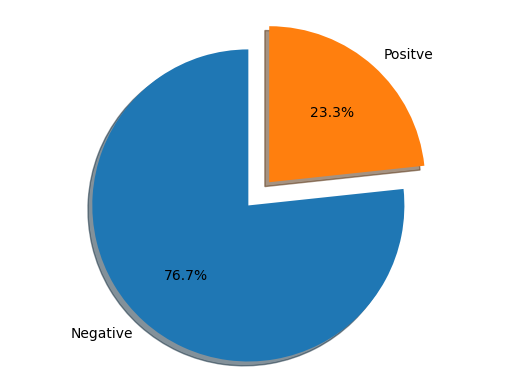

In [31]:
#percentage distrubtion of fasting blood sugar

fbs_counts = data['FastingBS'].value_counts()
labels = 'Negative', 'Positve'
explode = (0.1,0.1)

ax = plt.subplot()
ax.pie(fbs_counts, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax.axis('equal')
plt.show()

Only 23% of the patients have Fasting Blood Sugar

In [32]:
#Fasting Blood Sugar type distribution on heart disease

x='FastingBS'
clr='HeartDisease'
cdm = {0:'#C147E9',1:'#F06292'}

fbs_chest_hd = px.histogram(data, x=x,color=clr, barmode='group', color_discrete_map=cdm)
fbs_chest_hd.show()

Patients with Fasting Blood Sugar have a high chances of heart disease

ExerciseAngina
Oldpeak
ST_Slope

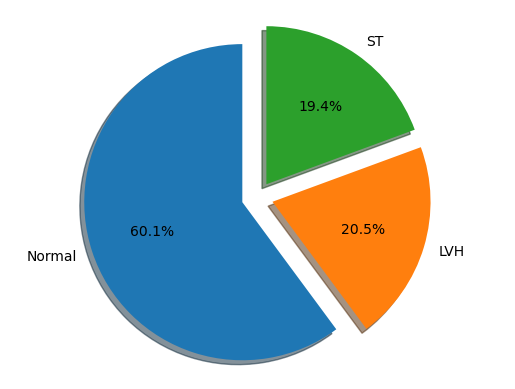

In [34]:
#percentage distrubtion of Resting ECG

fbs_counts = data['RestingECG'].value_counts()
labels = 'Normal', 'LVH', 'ST'
explode = (0.1,0.1,0.1)

ax = plt.subplot()
ax.pie(fbs_counts, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax.axis('equal')
plt.show()

In [35]:
#RestingECG Sugar type distribution on heart disease

x='RestingECG'
clr='HeartDisease'
cdm = {0:'#C147E9',1:'#F06292'}

fbs_chest_hd = px.histogram(data, x=x,color=clr, barmode='group', color_discrete_map=cdm)
fbs_chest_hd.show()

Have no clear information from this distribution.

In [36]:
#Checking the Distribution of MaxHR

mhr_his = px.histogram(data, x='MaxHR', marginal='box', color_discrete_sequence=['#C147E9'] )
mhr_his.update_layout(title='Max HR')
mhr_his.show()

In [37]:
#distribution of MaxHR as per heart disease

cls = 'HeartDisease'
x = 'MaxHR'
mrg = 'box'
hst = 'density'
cdm = {0:'#C147E9',1:'#F06292'}

mhr_hds = px.histogram(data, x=x, color=cls, marginal=mrg, histnorm=hst, color_discrete_map=cdm)
mhr_hds.show()